In [1]:
! pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

### 1. Distribution of the Target Variable

/tmp/ipython-input-3613414759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y, x='Target', palette='viridis')


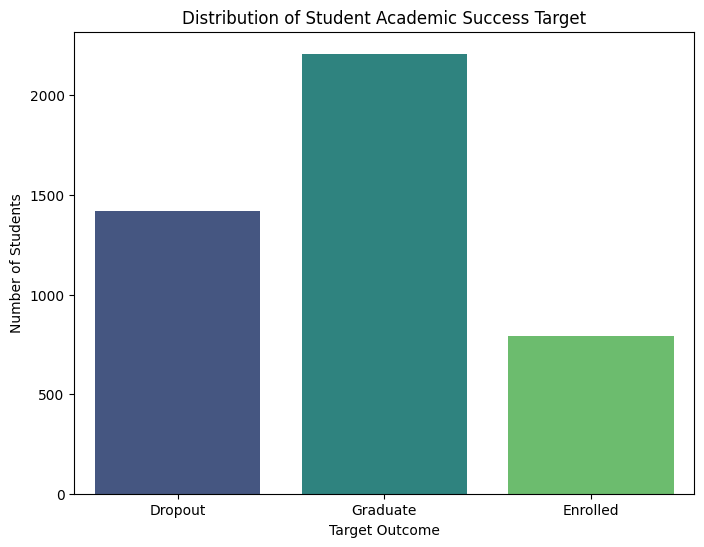

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=y, x='Target', palette='viridis')
plt.title('Distribution of Student Academic Success Target')
plt.xlabel('Target Outcome')
plt.ylabel('Number of Students')
plt.show()

### 2. Relationship between Key Features and Target Variable

First, let's combine the features `X` and the target `y` into a single DataFrame for easier plotting. Then, we can visualize the relationship between selected categorical and numerical features with the target variable.

In [3]:
import pandas as pd

df_combined = pd.concat([X, y], axis=1)
display(df_combined.head())

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Categorical Features vs. Target

Let's visualize some key categorical features against the `Target` variable to see how they influence student outcomes. We'll start with 'Marital Status' and 'Gender'.

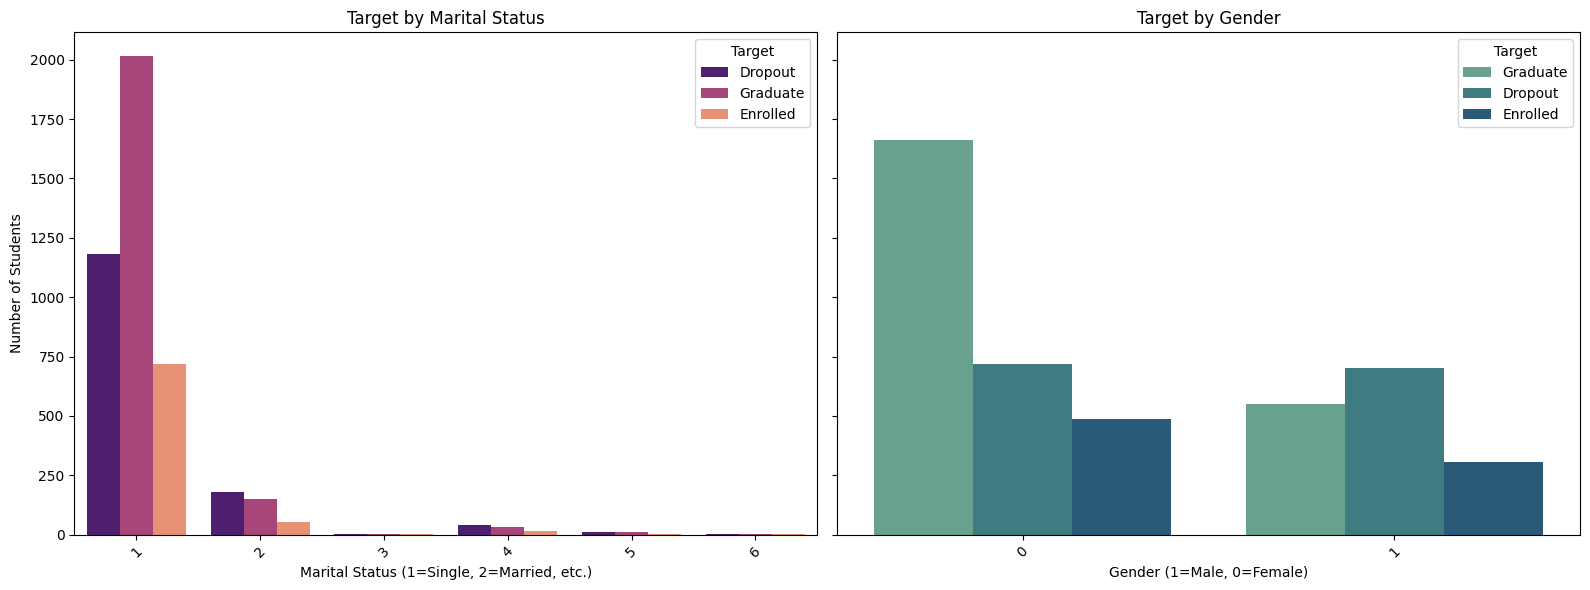

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(data=df_combined, x='Marital Status', hue='Target', palette='magma', ax=axes[0])
axes[0].set_title('Target by Marital Status')
axes[0].set_xlabel('Marital Status (1=Single, 2=Married, etc.)')
axes[0].set_ylabel('Number of Students')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_combined, x='Gender', hue='Target', palette='crest', ax=axes[1])
axes[1].set_title('Target by Gender')
axes[1].set_xlabel('Gender (1=Male, 0=Female)')
axes[1].set_ylabel('Number of Students')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Numerical Features vs. Target

Now, let's examine how some numerical features vary across the different target outcomes. We'll look at 'Age at enrollment' and 'Admission grade'.

/tmp/ipython-input-3180440667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Target', y='Age at enrollment', palette='viridis', ax=axes[0])
/tmp/ipython-input-3180440667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Target', y='Admission grade', palette='cividis', ax=axes[1])


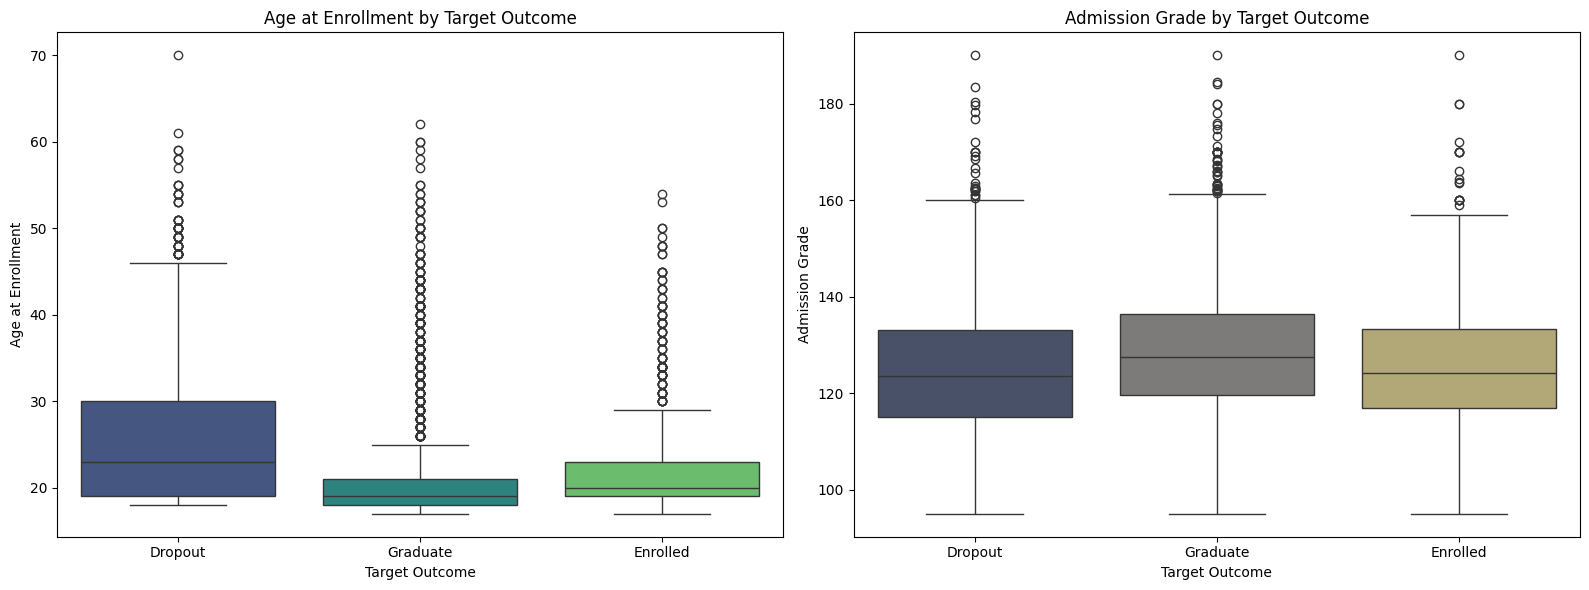

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_combined, x='Target', y='Age at enrollment', palette='viridis', ax=axes[0])
axes[0].set_title('Age at Enrollment by Target Outcome')
axes[0].set_xlabel('Target Outcome')
axes[0].set_ylabel('Age at Enrollment')

sns.boxplot(data=df_combined, x='Target', y='Admission grade', palette='cividis', ax=axes[1])
axes[1].set_title('Admission Grade by Target Outcome')
axes[1].set_xlabel('Target Outcome')
axes[1].set_ylabel('Admission Grade')

plt.tight_layout()
plt.show()